In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data = 'Data-3-5-AMP.xls'

In [4]:
readdata = pd.read_excel(data)

In [5]:
import matplotlib.pyplot as plt

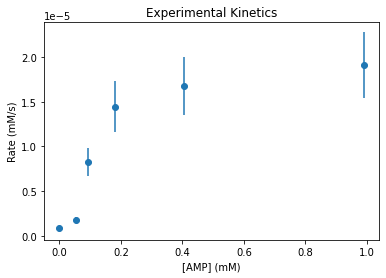

In [6]:
xlist = readdata["amp"]
ylist = readdata["rate"]
zlist = readdata["error"]
dataplot = plt.errorbar(xlist,ylist,zlist,fmt='o')
plt.xlabel('[AMP] (mM)')
plt.ylabel('Rate (mM/s)')
plt.title('Experimental Kinetics')
plt.savefig('expcurve.png',dpi=300)
plt.show()

Fit the derived function to the data

In [7]:
f6p = 0.1;
atp = 2.3;
pfk = 0.00012;
Kf6p = 0.11;
Katp = 0.42;
kCat = 0.4;

In [8]:
from scipy.optimize import curve_fit

In [32]:
def derived(x, w1, w2, Kamp, n):
    return kCat*pfk*(f6p/(Kf6p+f6p))*(atp/(Katp+atp))*(w1+w2*(((x/Kamp)**n)/(1+(x/Kamp)**n))/(1+w1+w2*(((x/Kamp)**n)/(1+(x/Kamp)**n))))

In [33]:
pars, cov = curve_fit(derived, xlist, ylist)

In [34]:
print(pars)

[ 0.01837426 11.44798947  0.26253513  2.79441456]


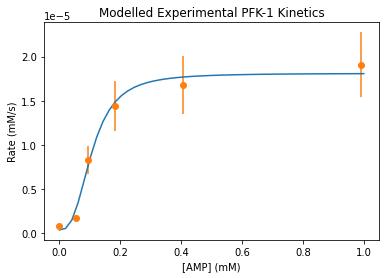

In [44]:
xDomain = np.linspace(0,1)
yvals  = derived(xDomain,pars[0],pars[1],pars[2],pars[3])
plt.plot(xDomain,yvals)
plt.errorbar(xlist,ylist,zlist,fmt='o')
plt.xlabel('[AMP] (mM)')
plt.ylabel('Rate (mM/s)')
plt.title('Modelled Experimental PFK-1 Kinetics')
plt.savefig('fitcurve.png',dpi=300)
plt.show()